In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income = pd.read_csv('income.csv')

In [3]:
data = income.copy()

# EXPLOTORY DATA ANALYSIS

1. GETTING TO KNOW THE DATA
2. DATA PRE PROCESSING (MISSING VALUES)
3. CROSS TABLES AND DATA VISUALIZATION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [7]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [8]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [9]:
summary_num = data.describe()

In [10]:
data.describe(include="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [11]:
summary_cat = data.describe(include="O")

In [12]:
data['JobType'].value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
data['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [14]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [15]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [16]:
data = pd.read_csv('income.csv', na_values = [" ?"])

# DATA PRE PROCESSING

In [18]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [19]:
missing = data[data.isnull().any(axis=1)]

In [20]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


points to note:
1. missing values in jobtype = 1809
2. missing values in occuption = 1819
3. There are 1809 rows where two specific columns i.e. occupation & JobType have missing values 
4. (1816-1809) = 7 => You still have occupation unfilled for these 7 rows. Because, jobtype is Never worked

In [22]:
data1 = data.dropna(axis=0)

In [23]:
corealation = data1.corr(numeric_only=True)

In [24]:
corealation #Correlation is a way to measure how two numbers (columns) are related.

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# CROSS TABLES AND DATA VISUALIZATION

In [26]:
data1.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [27]:
pd.crosstab(index = data1["gender"], columns = 'count', normalize = True)

col_0,count
gender,
Female,0.324315
Male,0.675685


gender vs salary status

In [29]:
pd.crosstab(index = data1["gender"], columns = data1["SalStat"], normalize = 'index', margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='SalStat'>

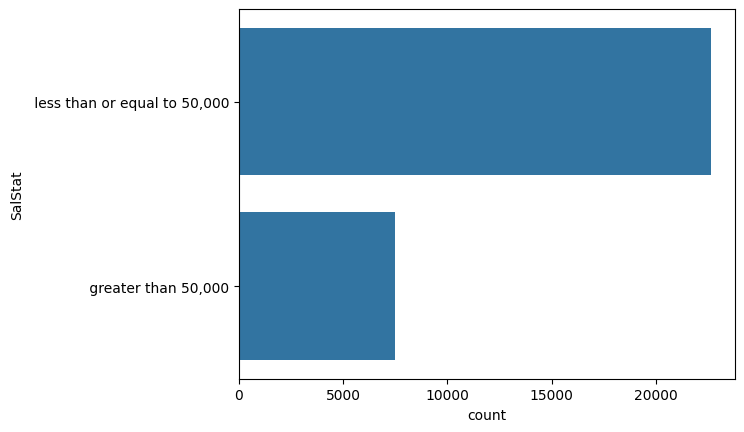

In [30]:
sns.countplot(data1['SalStat'])

C:\Users\makha\AppData\Local\Temp\ipykernel_40500\3218568021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['age'], bins=10, kde = False)


<Axes: xlabel='age'>

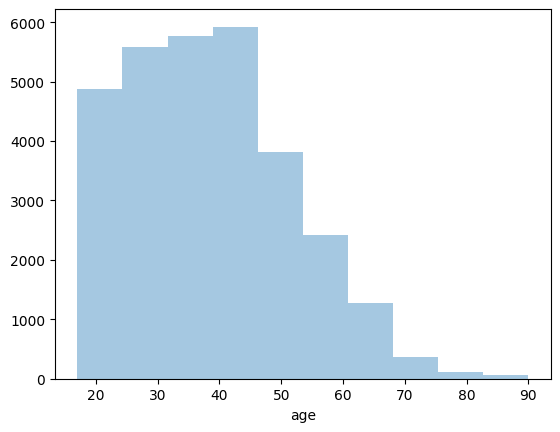

In [31]:
sns.distplot(data1['age'], bins=10, kde = False)

<bound method GroupBy.median of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001F69B2135F0>>

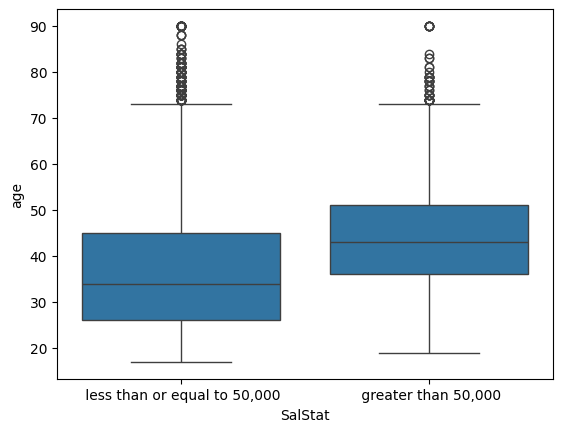

In [32]:
sns.boxplot(x='SalStat', y='age', data=data1)
data1.groupby('SalStat')['age'].median

reindexing salary status to 1 and 0

<BarContainer object of 30162 artists>

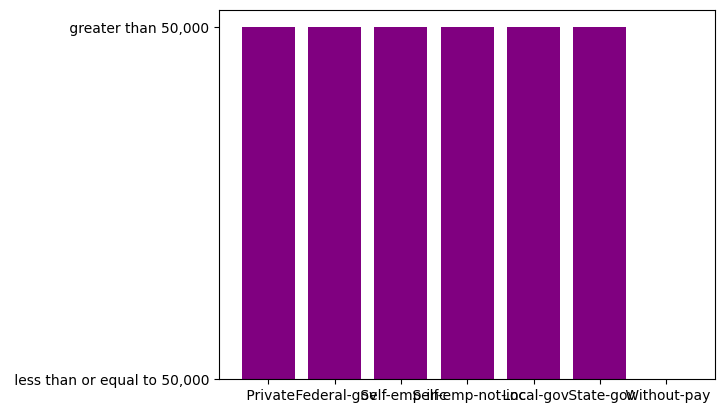

In [33]:
plt.bar(data1['JobType'], data1['SalStat'], color='purple', alpha=0.7)

In [35]:
data1['SalStat'] = data1['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})

C:\Users\makha\AppData\Local\Temp\ipykernel_40500\3047759667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SalStat'] = data1['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


In [65]:
print(data1['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [66]:
data1.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [73]:
new_data = pd.get_dummies(data1, drop_first = True)

In [75]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [81]:
# storing columns in lists
col_lists = list(new_data.columns)

In [83]:
col_lists

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [85]:
list(set(col_lists)-set(['SalStat']))

['nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ England',
 'nativecountry_ India',
 'occupation_ Machine-op-inspct',
 'relationship_ Other-relative',
 'nativecountry_ China',
 'occupation_ Prof-specialty',
 'occupation_ Transport-moving',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Protective-serv',
 'nativecountry_ Dominican-Republic',
 'race_ Other',
 'occupation_ Armed-Forces',
 'nativecountry_ Holand-Netherlands',
 'relationship_ Wife',
 'nativecountry_ Puerto-Rico',
 'hoursperweek',
 'occupation_ Tech-support',
 'occupation_ Handlers-cleaners',
 'EdType_ 7th-8th',
 'EdType_ Bachelors',
 'JobType_ Without-pay',
 'nativecountry_ Poland',
 'nativecountry_ Mexico',
 'occupation_ Farming-fishing',
 'nativecountry_ Trinadad&Tobago',
 'nativecountry_ Ireland',
 'EdType_ Assoc-voc',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ United-States',
 'nativecountry_ Peru',
 'gender_ Male',
 'occupation_ Exec-managerial',
 'nativecountry_ South',
 'maritalstatus

In [87]:
y = new_data['SalStat'].values

In [89]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(30162,))

In [91]:
x = new_data[col_lists].values
x

array([[45, 0, 0, ..., True, False, False],
       [24, 0, 0, ..., True, False, False],
       [44, 0, 0, ..., True, False, False],
       ...,
       [23, 0, 0, ..., True, False, False],
       [42, 0, 0, ..., True, False, False],
       [29, 0, 0, ..., True, False, False]],
      shape=(30162, 95), dtype=object)